In [56]:
import json

import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Load data

In [18]:
# geo-json data from (3)
with open("data/point_price_data/L01-21_13_GML\L01-21_13.geojson") as f:
    data = json.load(f)

In [65]:
df = pd.DataFrame()

for d in data['features']:
    land_price = d['properties']['L01_006']
    lon, lat = d['geometry']['coordinates']
    
    df = df.append({'landPrice': int(land_price), 'lat':float(lat), 'lon': float(lon)}, ignore_index=True)
    
df['landPriceLog'] = df['landPrice'].apply(np.log)
df['landPriceLevel'] = pd.cut(df.landPriceLog, 10, labels=False)

# Visualization

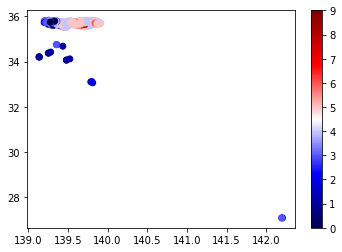

In [75]:
plt.scatter(df.lon, df.lat, cmap=cm.seismic, c=df.landPriceLevel)
plt.colorbar()

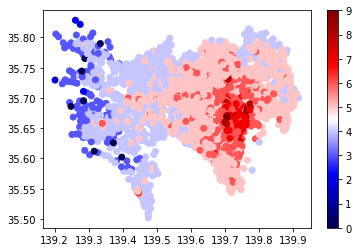

In [82]:
# Zoom in
_df = df[(df.lat>35)&(df.lon<141)]
plt.scatter(_df.lon, _df.lat, cmap=cm.seismic, c=_df.landPriceLevel)
plt.colorbar()